In [61]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [62]:
#training dataset
df = pd.read_csv('/content/Wheat_Blumeria_V01_2022.csv')

In [63]:
df.head()

,sample_date,min_ta,max_ta,avg_ta,cum_rain,avg_hum,min_hum,max_hum,cum_leaf_wet,prim_output,Disease
0,3/1/2022,-0.63,8.64,4.619024,0.0,57.682927,41.0,80.5,0.000000,0,0
1,3/2/2022,-4.68,11.27,3.321667,0.0,66.729167,37.0,95.0,0.983333,0,0
2,3/3/2022,1.23,14.45,6.588958,0.0,63.447917,33.0,86.0,0.000000,0,0
3,3/4/2022,-1.79,12.27,5.757292,0.0,74.385417,56.5,91.5,3.850000,0,0
4,3/5/2022,1.23,8.66,6.203125,0.4,70.395833,53.0,83.5,9.183333,0,0


In [64]:
df.shape

(195, 11)

In [65]:
df.isna().sum()

sample_date     0
min_ta          0
max_ta          0
avg_ta          0
cum_rain        0
avg_hum         0
min_hum         0
max_hum         0
cum_leaf_wet    2
prim_output     0
Disease         0
dtype: int64

In [66]:
# prompt: fill na

df.fillna(df.mean(),inplace=True)


<ipython-input-66-991848f0e806>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [67]:
df['sample_date'] = pd.to_datetime(df['sample_date'], format='%m/%d/%Y')

print(df)

    sample_date  min_ta  max_ta     avg_ta  cum_rain    avg_hum  min_hum  \
0    2022-03-01   -0.63    8.64   4.619024       0.0  57.682927     41.0   
1    2022-03-02   -4.68   11.27   3.321667       0.0  66.729167     37.0   
2    2022-03-03    1.23   14.45   6.588958       0.0  63.447917     33.0   
3    2022-03-04   -1.79   12.27   5.757292       0.0  74.385417     56.5   
4    2022-03-05    1.23    8.66   6.203125       0.4  70.395833     53.0   
..          ...     ...     ...        ...       ...        ...      ...   
190  2022-09-07   19.17   28.17  22.906250       0.0  77.093750     53.5   
191  2022-09-08   16.85   27.28  21.711042       0.6  83.010417     59.5   
192  2022-09-09   14.53   30.64  22.402500       0.0  67.250000     32.5   
193  2022-09-10   10.28   27.51  19.641042       0.0  63.833333     34.0   
194  2022-09-11   11.31   28.25  20.113958       0.0  65.156250     36.0   

     max_hum  cum_leaf_wet  prim_output  Disease  
0       80.5      0.000000          

In [68]:
df.describe()

,min_ta,max_ta,avg_ta,cum_rain,avg_hum,min_hum,max_hum,cum_leaf_wet,prim_output,Disease
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,12.522974,25.201333,18.806511,1.264615,71.302573,47.012821,92.748718,8.056477,0.020513,0.020513
std,6.937873,7.633137,6.948071,4.202028,10.132531,14.114447,6.664526,8.004767,0.142111,0.142111
min,-4.970000,6.250000,2.733636,0.000000,22.322917,14.500000,34.000000,0.000000,0.000000,0.000000
25%,7.875000,19.840000,12.866250,0.000000,65.987331,37.750000,92.000000,0.000000,0.000000,0.000000
50%,15.170000,27.650000,21.545000,0.000000,72.375000,46.500000,94.500000,6.833333,0.000000,0.000000
75%,17.700000,31.365000,24.224792,0.000000,77.114583,54.250000,96.000000,11.208333,0.000000,0.000000
max,22.970000,35.910000,28.466875,28.000000,94.218750,91.000000,99.000000,23.500000,1.000000,1.000000


In [69]:
df.columns

Index(['sample_date', 'min_ta', 'max_ta', 'avg_ta', 'cum_rain', 'avg_hum',
       'min_hum', 'max_hum', 'cum_leaf_wet', 'prim_output', 'Disease'],
      dtype='object')

In [70]:
df.columns[df.isnull().any()]

Index([], dtype='object')

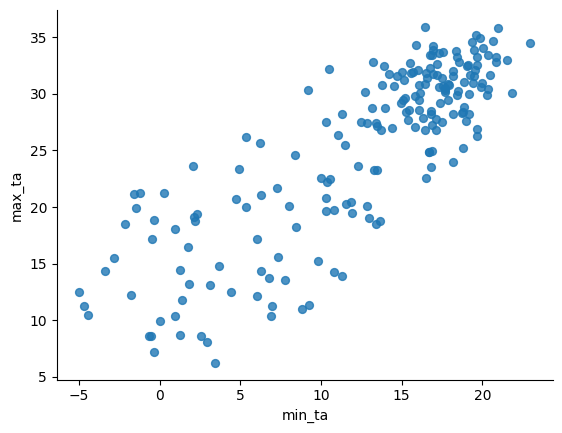

In [71]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='min_ta', y='max_ta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

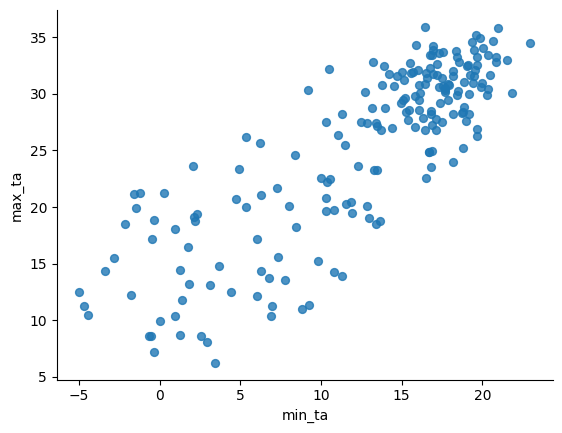

In [72]:
# Scatter plot of temperature

df.plot(kind='scatter', x='min_ta', y='max_ta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


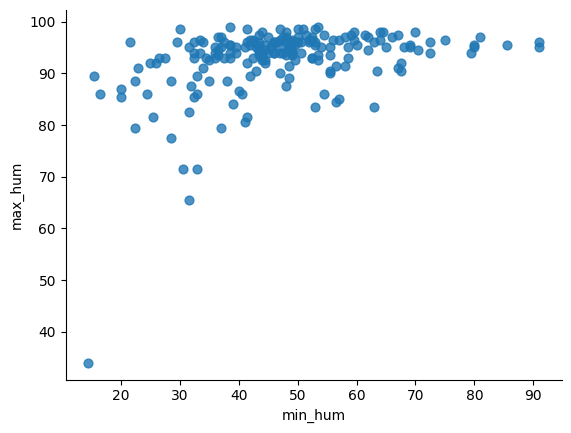

In [73]:
# Scatter plot of Humidity

df.plot(kind='scatter', x='min_hum', y='max_hum', s=40, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

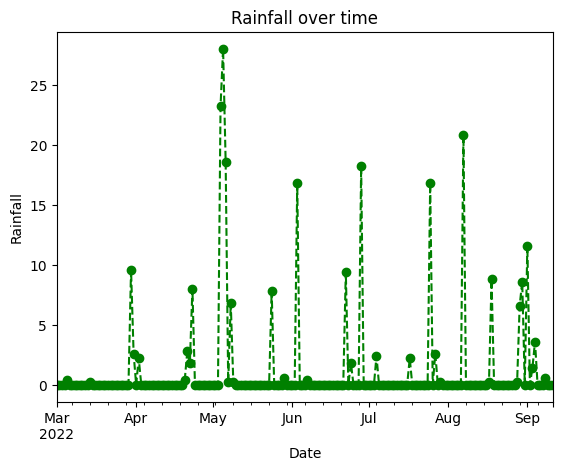

In [74]:
# scatter date rainfall

df.groupby('sample_date')['cum_rain'].mean().plot(kind='line', color='green',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall over time')
plt.show()


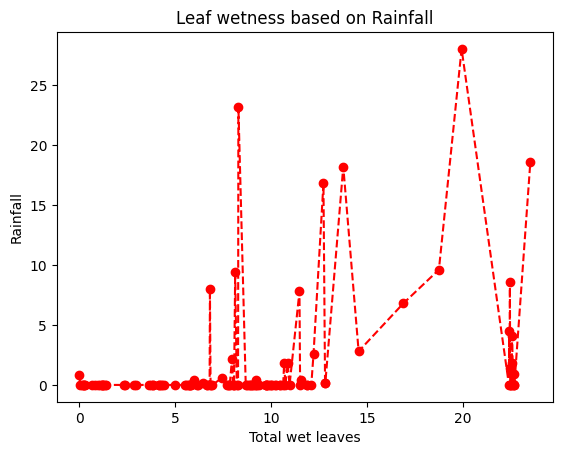

In [75]:
df.groupby('cum_leaf_wet')['cum_rain'].mean().plot(kind='line', color='red',marker='o', linestyle='dashed')
plt.xlabel('Total wet leaves')
plt.ylabel('Rainfall')
plt.title('Leaf wetness based on Rainfall')
plt.show()

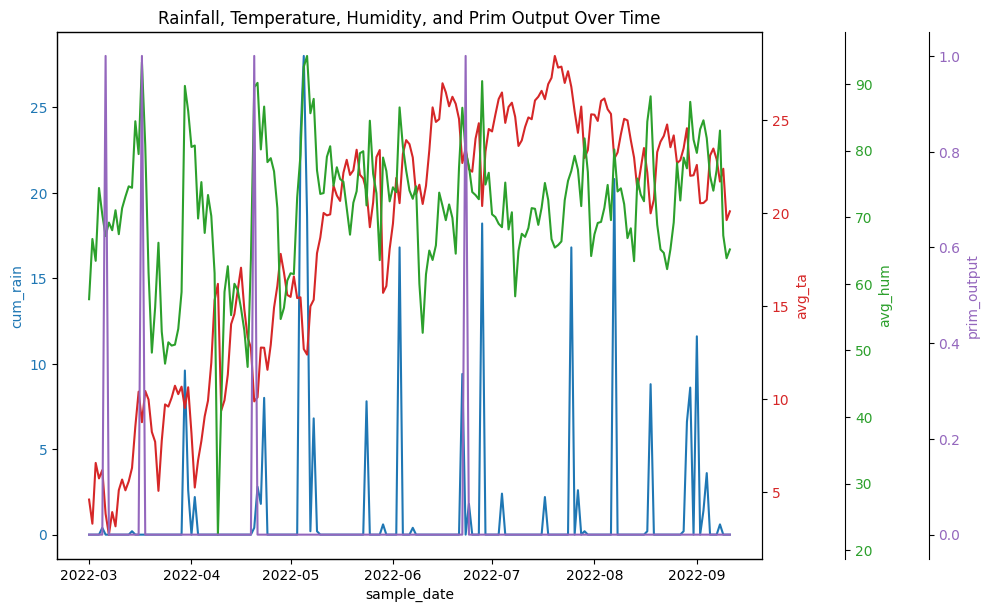

In [76]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Rainfall
color = 'tab:blue'
ax1.set_xlabel('sample_date')
ax1.set_ylabel('cum_rain', color=color)
ax1.plot(df['sample_date'], df['cum_rain'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('avg_ta', color=color)
ax2.plot(df['sample_date'], df['avg_ta'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Creating a third y-axis for Humidity
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('avg_hum', color=color)
ax3.plot(df['sample_date'], df['avg_hum'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Creating a fourth y-axis for Prim Output
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
color = 'tab:purple'
ax4.set_ylabel('prim_output', color=color)
ax4.plot(df['sample_date'], df['prim_output'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

# Adjust layout to prevent clipping of the secondary axes
fig.tight_layout()

plt.title('Rainfall, Temperature, Humidity, and Prim Output Over Time')
plt.show()

SPLITTING DATESET

In [77]:
df1 = df.drop("sample_date", axis=1)
P = df1[["Disease"]]
X = df1.drop(["Disease"],axis=1)
Y = df1.drop(["Disease"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,P,test_size=0.2,random_state=42)

In [78]:
print(f'Train: {x_train.shape}, {y_train.shape}')
print(f'Test: {x_test.shape}, {y_test.shape}')

Train: (156, 9), (156, 1)
Test: (39, 9), (39, 1)


Random forest

In [79]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

training accuracy is: 1.0
testing accuracy is: 1.0


Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions1 = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  1.0


SVM model

In [81]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [82]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [83]:
# value using LabelEncoder
encoder = LabelEncoder()
df1["Disease"] = encoder.fit_transform(df1["Disease"])

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
}

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([("classifier", model)])

# Producing cross-validation score for the models
for model_name, pipeline in pipelines.items():
    scores = cross_val_score(
        pipeline, X, y, cv=10, n_jobs=-1, scoring="accuracy"
    )
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1.   0.95 0.95 0.95 0.95 1.   1.   1.   1.   1.  ]
Mean Score: 0.9800000000000001
Gaussian NB
Scores: [0.9  0.95 1.   0.65 0.95 1.   1.   1.   1.   1.  ]
Mean Score: 0.945
Random Forest
Scores: [0.8  0.95 1.   0.95 0.95 1.   1.   1.   1.   1.  ]
Mean Score: 0.9650000000000001


Accuracy on train data by SVC Classifier: 98.07692307692307
Accuracy on test data by SVC Classifier: 97.43589743589743


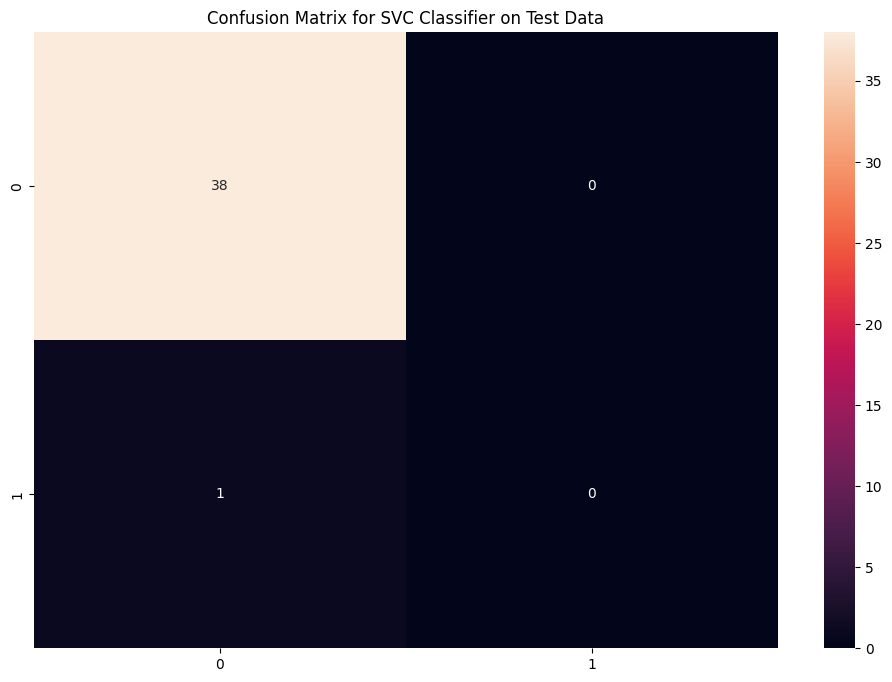

Accuracy on train data by Gaussian NB Classifier: 99.35897435897436
Accuracy on test data by Gaussian NB Classifier: 94.87179487179486


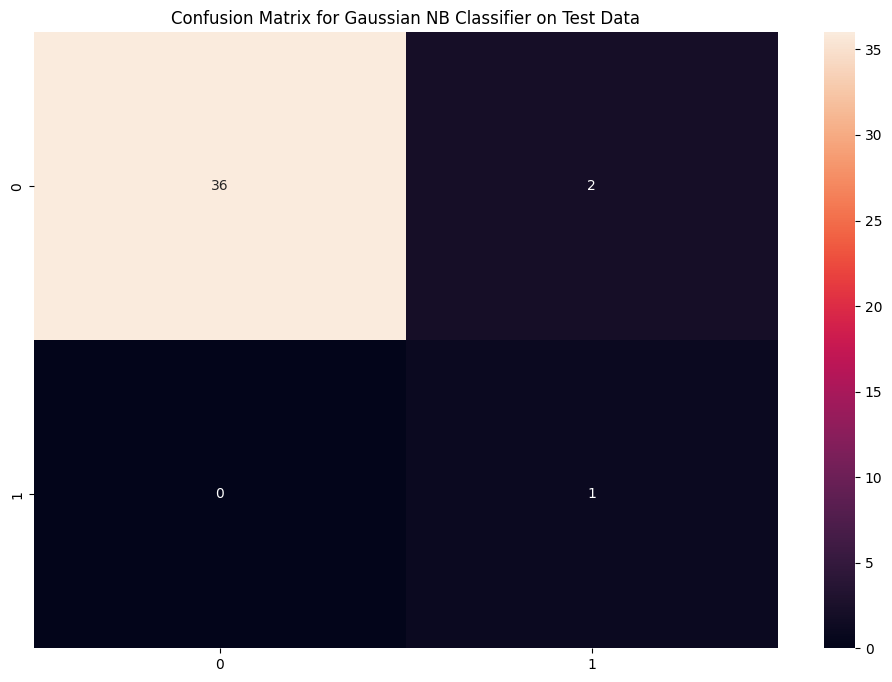

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 97.43589743589743


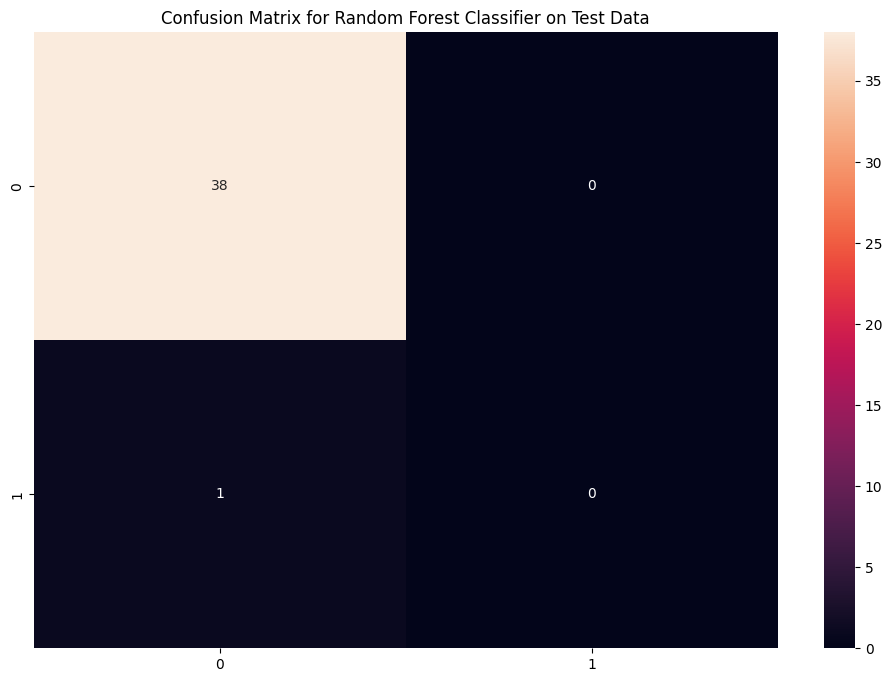

In [84]:
# Training and testing each model
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"Accuracy on train data by {model_name} Classifier: {accuracy_score(y_train, pipeline.predict(X_train)) * 100}")
    print(f"Accuracy on test data by {model_name} Classifier: {accuracy_score(y_test, preds) * 100}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
    plt.show()

In [85]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


RandomForestClassifier(random_state=18)

Accuracy on Test dataset by the combined model: 100.0


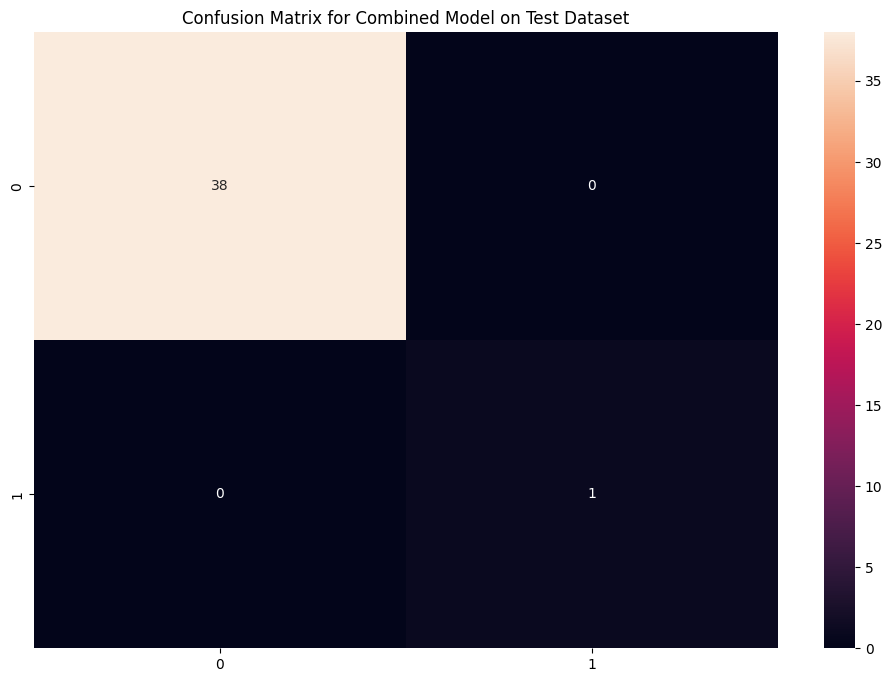

In [86]:
# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(X_test)
nb_preds = final_nb_model.predict(X_test)
rf_preds = final_rf_model.predict(X_test)

# Use SciPy's mode function
final_preds, _ = mode([svm_preds, nb_preds, rf_preds], axis=0)

# Calculating and printing accuracy on the test dataset
accuracy = accuracy_score(y_test, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy}")

# Visualizing the confusion matrix
cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()